In [122]:
# Para iniciar siempre importamos las librerias que vamos a usar.
import re
from re import sub
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from html.parser import HTMLParser
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
import seaborn as sns
import missingno as msno
import geopandas as gpd
import math
import time
from scipy.spatial.distance import pdist, squareform

In [123]:
# importamos el archivo 
df = pd.read_csv('OnlineRetail.csv', header= 0, encoding="iso-8859-1")

In [124]:
# Visualizamos el dataset
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [125]:
# Visualizamos las 20 primeas filas
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [126]:
# Hacemos un describe para ver sus valores
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [127]:
# Visualizamos los datos faltantes
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<AxesSubplot:>

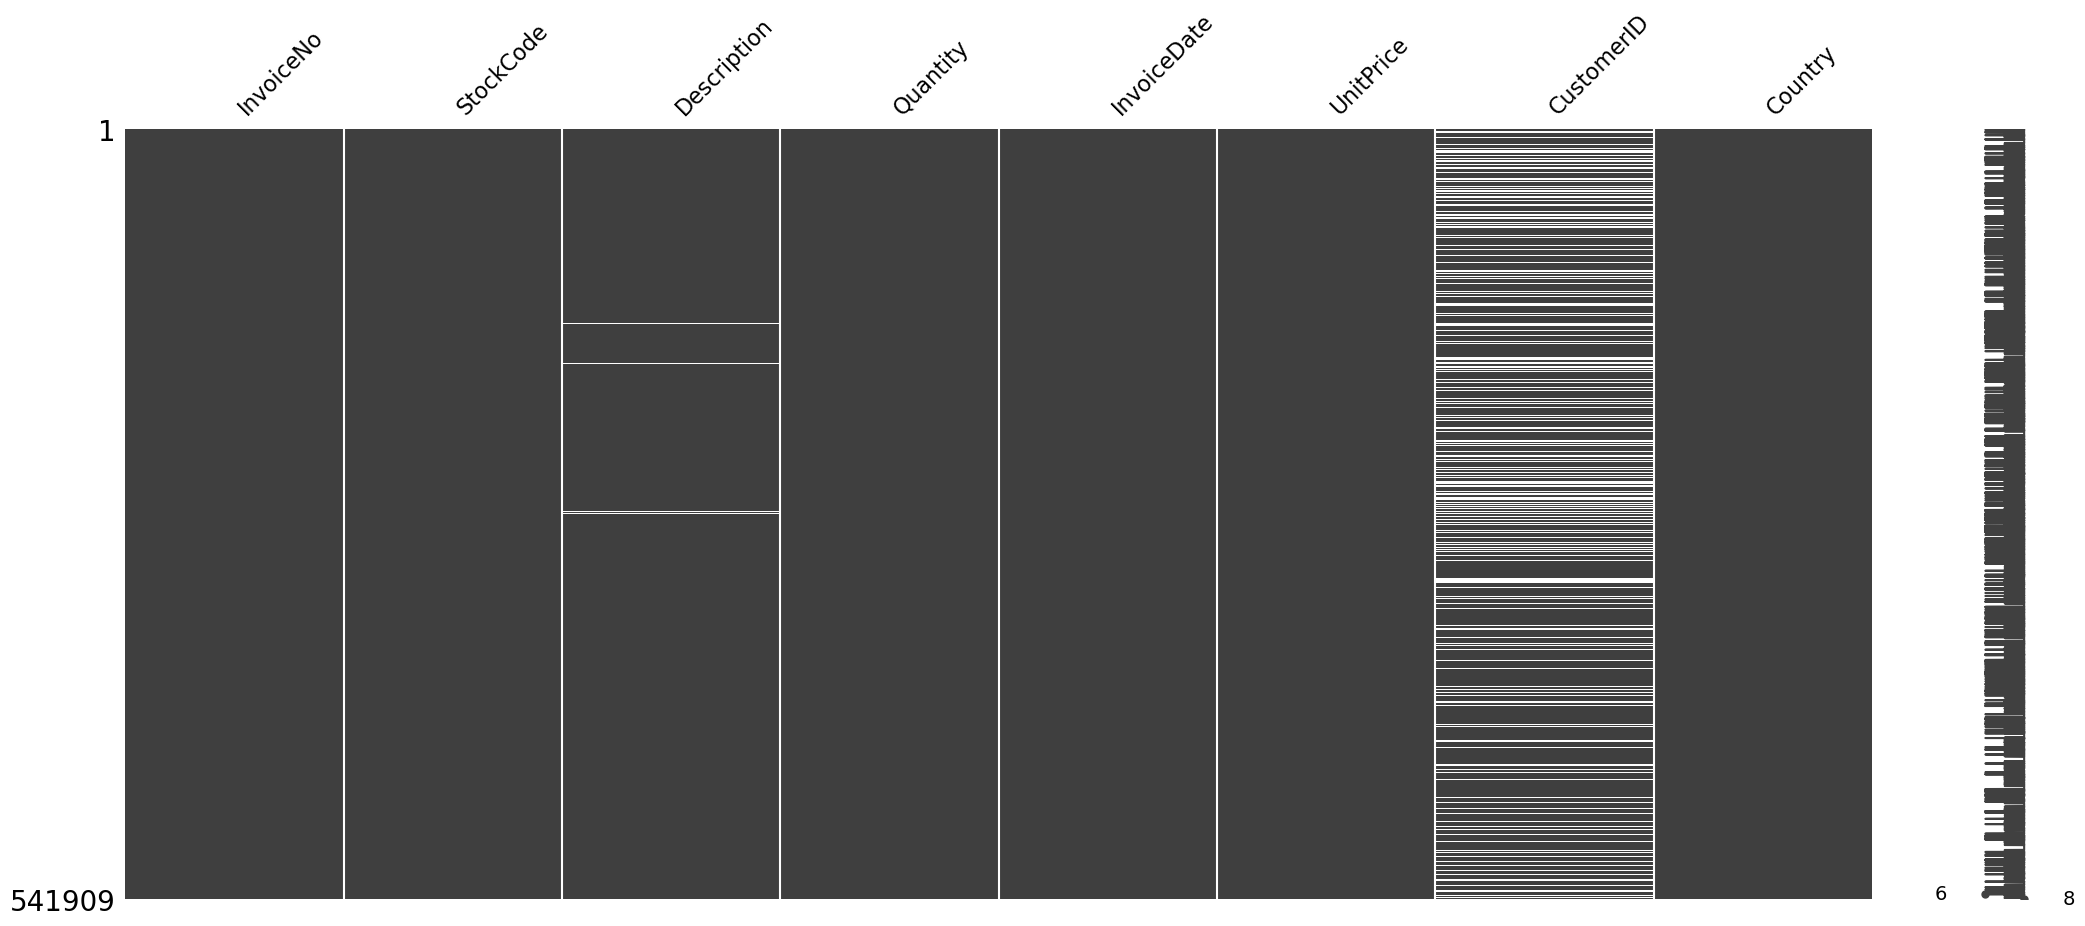

In [128]:
msno.matrix(df)

In [129]:
# Eliminamos los nan de las columnas.
df = df.dropna(axis = 0)

In [130]:
# Hacemos un reseset de los index
df = df.reset_index(drop=True)

<AxesSubplot:>

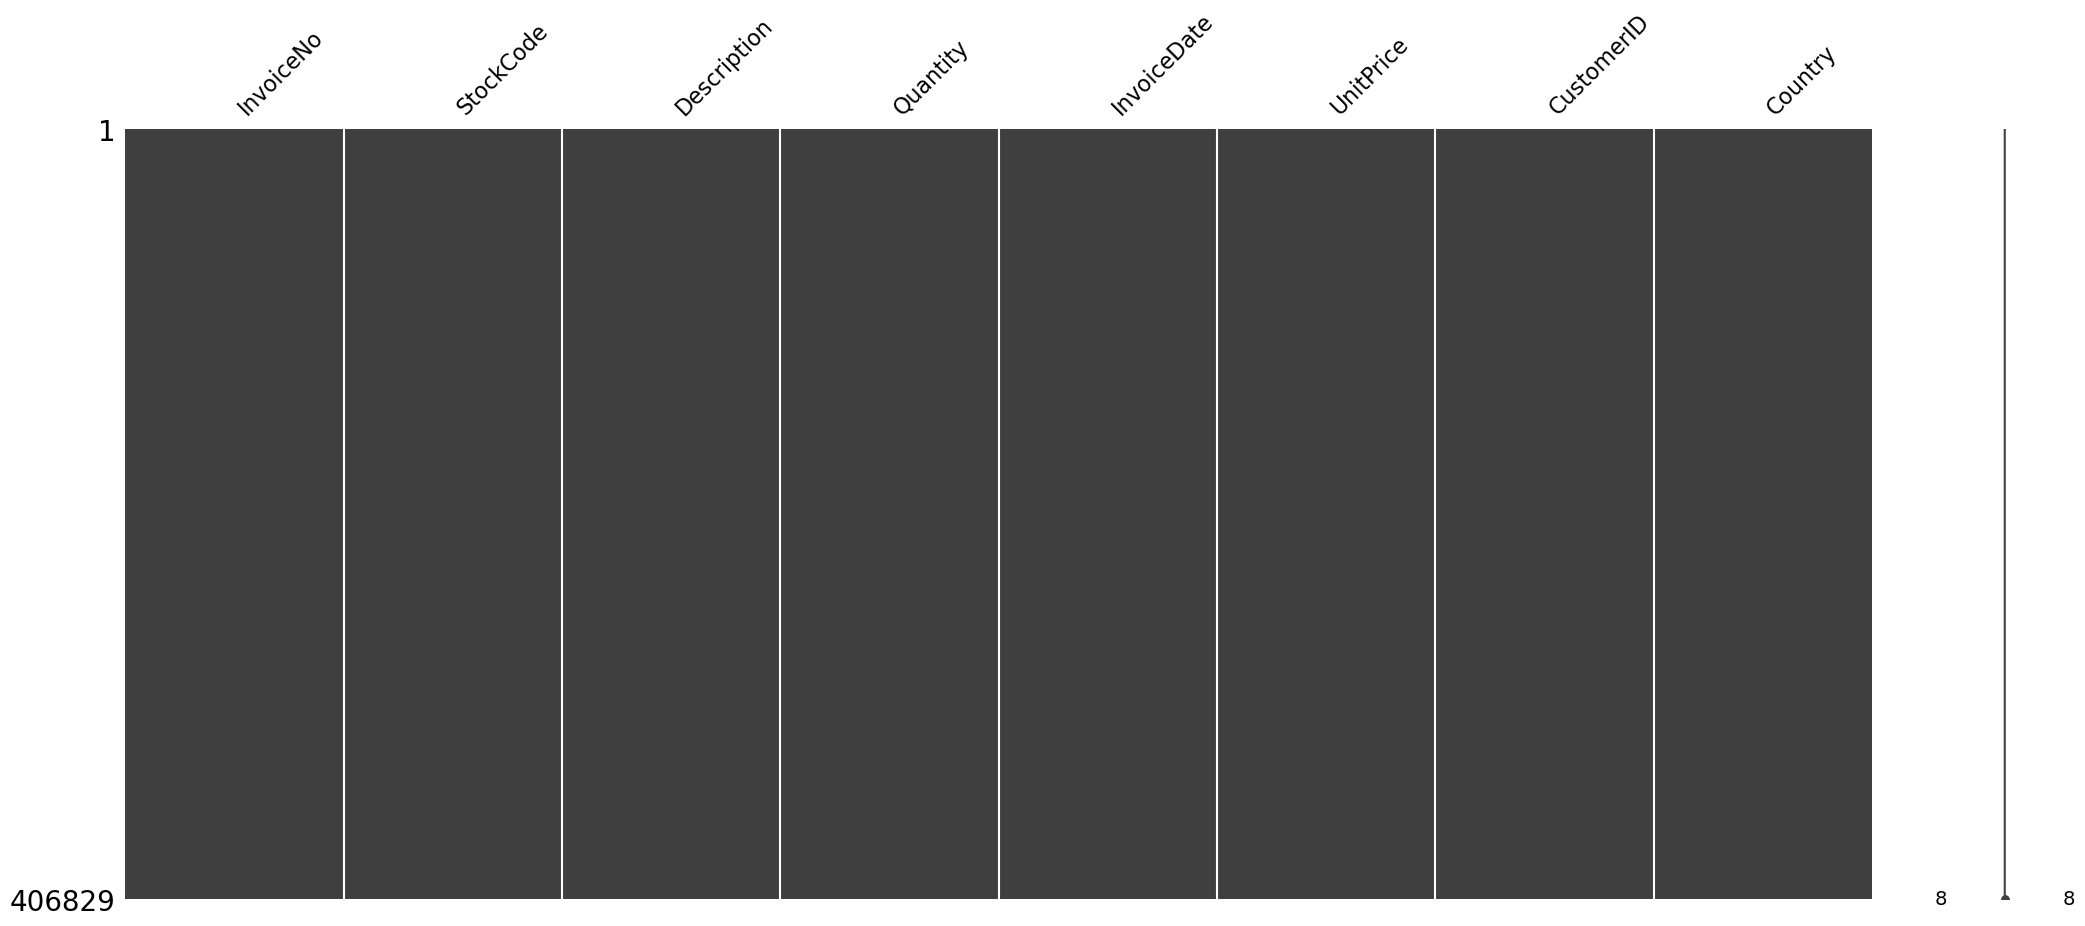

In [131]:
# Visualizamos 
msno.matrix(df)

In [132]:
# Vemos ahora que ya se eliminaron los datos faltantes o NAN.
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [133]:
# Hacemos un value count de la columna de los paises para visualizarlos en su totalidad.
df['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [134]:
# Reemplazamos los nombres de los paises que esten mal escrito para poder hacer el merge con geopandas.

#df = df["Country"].replace({"RSA": "Russia", "EIRE": "Ireland"})
df.loc[df['Country'] == 'EIRE', 'Country'] = 'Ireland'
df.loc[df['Country'] == 'RSA', 'Country'] = 'Russia'
df.loc[df['Country'] == 'USA', 'Country'] = 'United States of America'

In [135]:
# Hacemos un value count de la columna de los paises para visualizarlos en su totalidad.
df['Country'].value_counts()

United Kingdom              361878
Germany                       9495
France                        8491
Ireland                       7485
Spain                         2533
Netherlands                   2371
Belgium                       2069
Switzerland                   1877
Portugal                      1480
Australia                     1259
Norway                        1086
Italy                          803
Channel Islands                758
Finland                        695
Cyprus                         622
Sweden                         462
Austria                        401
Denmark                        389
Japan                          358
Poland                         341
United States of America       291
Israel                         250
Unspecified                    244
Singapore                      229
Iceland                        182
Canada                         151
Greece                         146
Malta                          127
United Arab Emirates

In [136]:
# Ordenamos la columna de country en forma ascendente.
manf_sort = pd.get_dummies(df["Country"]).sum().sort_values(ascending = False)

C:\Users\jesus\Nuevo Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


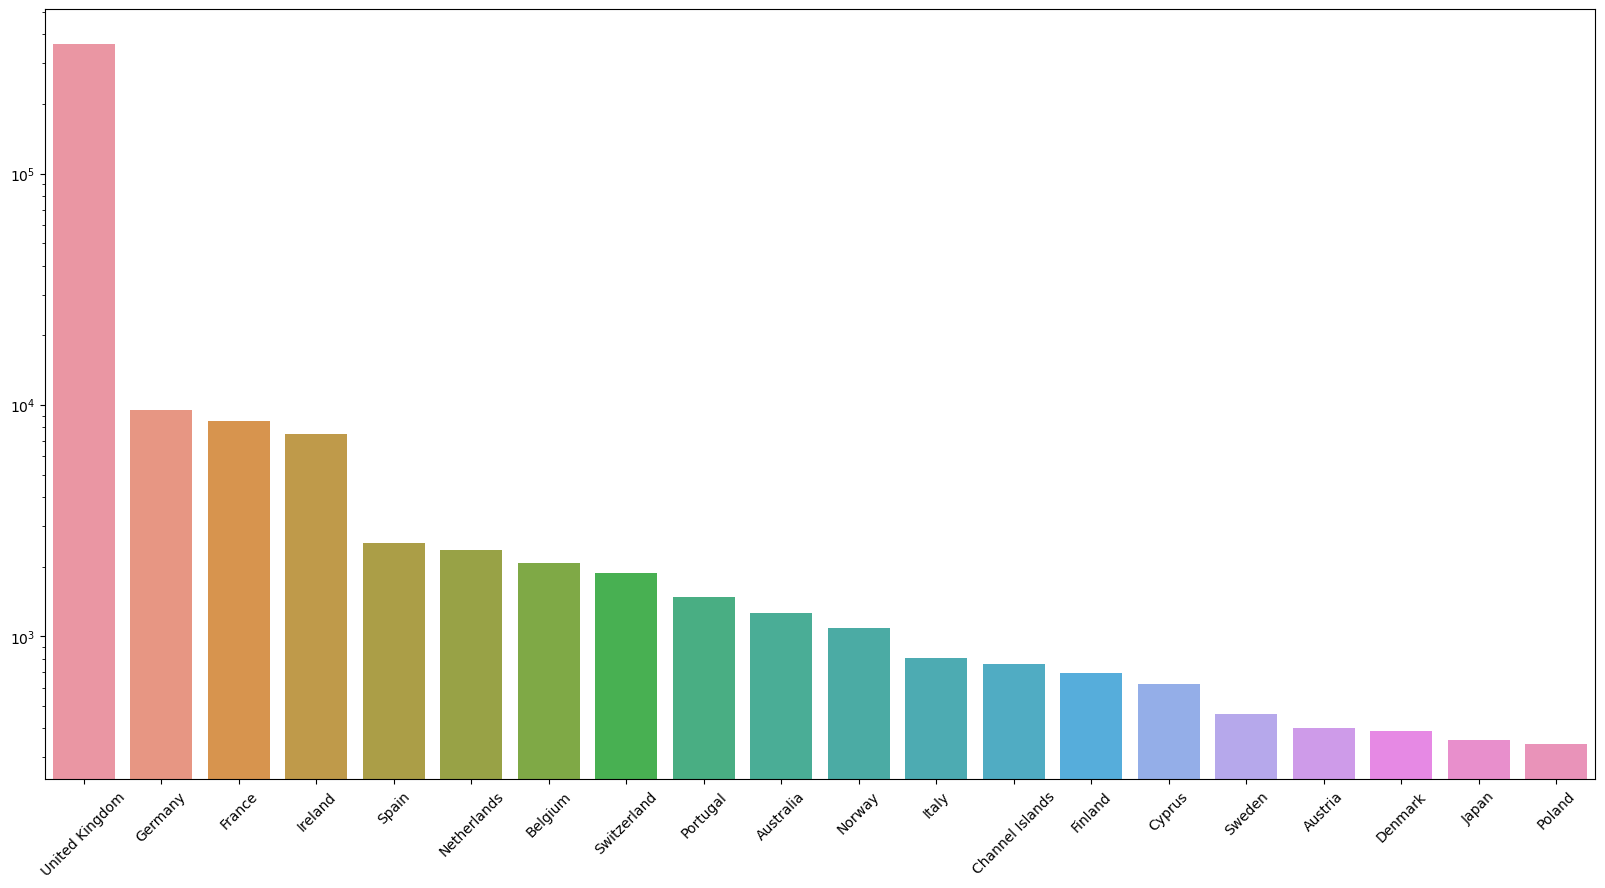

In [137]:
# Hacemos un grafico de los 20 primeros paises.
firstTwenty=manf_sort[:20]
plt.figure(figsize=(20,10))
sns.barplot(firstTwenty.index,firstTwenty.values)
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

In [138]:
# Agrupamos por categoría y sumamos las cantidades
sumPaises = df.groupby('Country')['Quantity'].sum()

In [139]:
# Visualizamos la sumatoria por paises.
sumPaises

Country
Australia                     83653
Austria                        4827
Bahrain                         260
Belgium                       23152
Brazil                          356
Canada                         2763
Channel Islands                9479
Cyprus                         6317
Czech Republic                  592
Denmark                        8188
European Community              497
Finland                       10666
France                       109848
Germany                      117448
Greece                         1556
Iceland                        2458
Ireland                      136329
Israel                         3990
Italy                          7999
Japan                         25218
Lebanon                         386
Lithuania                       652
Malta                           944
Netherlands                  200128
Norway                        19247
Poland                         3653
Portugal                      16044
Russia              

In [140]:
# Lo convertimos en un dataframe
df2 = pd.DataFrame(sumPaises)

In [141]:
# Lo visualizamos.
df2

,Quantity
Country,
Australia,83653
Austria,4827
Bahrain,260
Belgium,23152
Brazil,356
Canada,2763
Channel Islands,9479
Cyprus,6317
Czech Republic,592


In [142]:
#df2 = df2.drop(["Unspecified"], axis=0, inplace=True)
#df2.loc[df2['Country'] == 'USA', 'Country'] = 'United States of America'

In [143]:
# Lee los datos de los límites de los países
paises = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Ver el listado completo
pd.set_option('display.max_rows', 200)
paises

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,8.899530e+05,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,5.800546e+07,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,6.032530e+05,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,3.758926e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,1.851393e+07,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,3.358065e+07,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,8.776109e+06,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,2.706256e+08,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,4.493871e+07,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [144]:
# Unir los datos de los países con los datos de ventas por país
paises_ventas = paises.merge(df2, left_on='name', right_on='Country')
paises_ventas

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Quantity
0,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2763
1,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1034
2,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",352
3,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",19247
4,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",356
5,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",109848
6,9053300.0,Asia,Israel,ISR,394652,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",3990
7,6855713.0,Asia,Lebanon,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427...",386
8,9770529.0,Asia,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",982
9,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",35637


In [145]:
# Creamos una nueva columna para mostrar el valor "Quantity" en escala logaritmica.
paises_ventas["log10Y"] = paises_ventas["Quantity"].apply(lambda x: math.log10(x))
paises_ventas

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Quantity,log10Y
0,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2763,3.441381
1,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1034,3.014521
2,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",352,2.546543
3,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",19247,4.284363
4,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",356,2.551450
5,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",109848,5.040792
6,9053300.0,Asia,Israel,ISR,394652,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",3990,3.600973
7,6855713.0,Asia,Lebanon,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427...",386,2.586587
8,9770529.0,Asia,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",982,2.992111
9,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",35637,4.551901


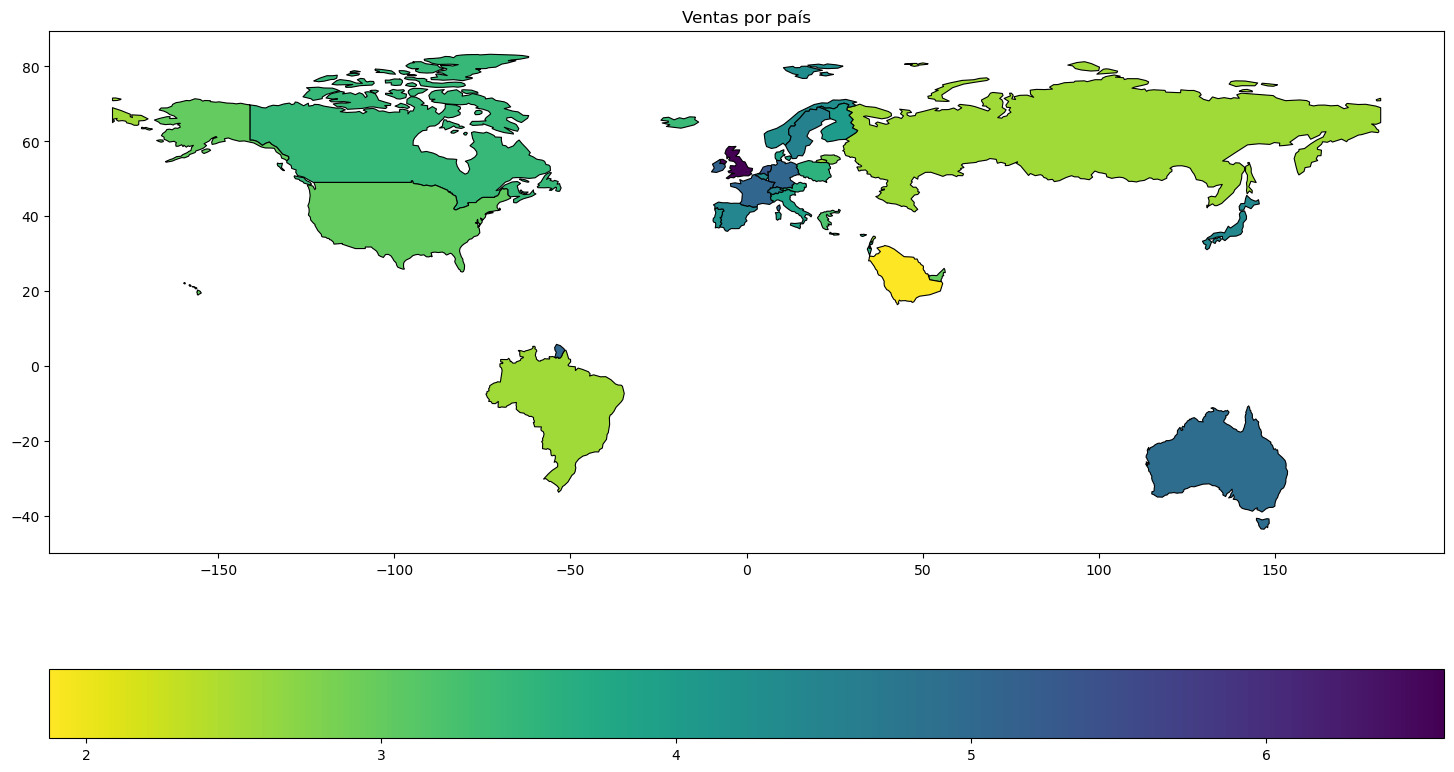

In [146]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(18, 10))

# Dibujar los países en el mapa y colorearlos según las ventas
paises_ventas.plot(ax=ax, column='log10Y', cmap='viridis_r', linewidth=0.8, edgecolor='black', legend=True,  legend_kwds={'orientation': "horizontal"})

# Añadir un título al mapa
ax.set_title('Ventas por país')

# Mostrar el mapa
plt.show()

In [147]:
df["Country"].replace({"RSA": "Russia", "EIRE": "Ireland"})

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
406824            France
406825            France
406826            France
406827            France
406828            France
Name: Country, Length: 406829, dtype: object

In [148]:
# Visualizamos los articulos y los mas vendidos.
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64

In [149]:
# Visualizamos los articulos y los mas caros.
df['UnitPrice'].value_counts()

1.25      46555
1.65      37503
2.95      27211
0.85      26396
0.42      22032
          ...  
3.56          1
4.37          1
6.89          1
0.98          1
224.69        1
Name: UnitPrice, Length: 620, dtype: int64

In [150]:
# Visualizamos de los valores de los articulo.
df['UnitPrice'].value_counts().tolist()

[46555,
 37503,
 27211,
 26396,
 22032,
 18654,
 18091,
 17472,
 15945,
 12904,
 12904,
 12829,
 8183,
 7803,
 7746,
 7514,
 7357,
 6999,
 5988,
 5759,
 5757,
 5686,
 4393,
 4257,
 3749,
 3724,
 2849,
 2707,
 2428,
 2184,
 2155,
 1893,
 1552,
 1417,
 1347,
 1255,
 1251,
 1250,
 1235,
 1229,
 1138,
 1131,
 1073,
 1064,
 1047,
 1010,
 1009,
 996,
 883,
 839,
 830,
 792,
 759,
 752,
 722,
 688,
 638,
 630,
 594,
 536,
 533,
 498,
 436,
 359,
 340,
 335,
 298,
 297,
 282,
 276,
 259,
 237,
 222,
 222,
 204,
 184,
 180,
 166,
 165,
 153,
 146,
 142,
 139,
 138,
 137,
 135,
 135,
 125,
 120,
 113,
 111,
 107,
 100,
 99,
 99,
 95,
 91,
 89,
 87,
 77,
 73,
 73,
 69,
 67,
 67,
 66,
 66,
 63,
 60,
 60,
 59,
 58,
 57,
 56,
 55,
 54,
 54,
 53,
 50,
 49,
 48,
 46,
 46,
 45,
 45,
 41,
 41,
 40,
 38,
 35,
 33,
 33,
 32,
 30,
 29,
 29,
 28,
 27,
 27,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 23,
 22,
 21,
 21,
 21,
 20,
 20,
 19,
 18,
 18,
 17,
 17,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 13

In [151]:
# Visualizamos de los valores de los articulo.
by_year = df.sort_values('UnitPrice',ascending=False)
by_year.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
229362,564651,21786,POLKADOT RAIN HAT,144,8/26/2011 14:19,0.0,14646.0,Netherlands
87903,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
327463,574138,23234,BISCUIT TIN VINTAGE CHRISTMAS,216,11/3/2011 11:26,0.0,12415.0,Australia
327630,574175,22065,CHRISTMAS PUDDING TRINKET POT,12,11/3/2011 11:47,0.0,14110.0,United Kingdom
327992,574252,M,Manual,1,11/3/2011 13:24,0.0,12437.0,France
293578,571035,M,Manual,1,10/13/2011 12:50,0.0,12446.0,Russia
202073,561669,22960,JAM MAKING SET WITH JARS,11,7/28/2011 17:09,0.0,12507.0,Spain
329894,574469,22385,JUMBO BAG SPACEBOY DESIGN,12,11/4/2011 11:55,0.0,12431.0,Australia
342115,575579,22089,PAPER BUNTING VINTAGE PAISLEY,24,11/10/2011 11:49,0.0,13081.0,United Kingdom
26046,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,Ireland


In [152]:
# Vemos la cantida de clientes que hay.
df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [153]:
# Vemos la cantida de ventas que hay.
df['InvoiceNo'].value_counts()

576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
554155      1
570248      1
545414      1
545418      1
565192      1
Name: InvoiceNo, Length: 22190, dtype: int64

In [154]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [155]:
# Convertir celdas de texto en celdas de tipo datetime
df['fecha'] = pd.to_datetime(df['InvoiceDate'])


In [156]:
# Verificamos el tipo de dato de la columna FECHA.
df['fecha'].dtype

dtype('<M8[ns]')

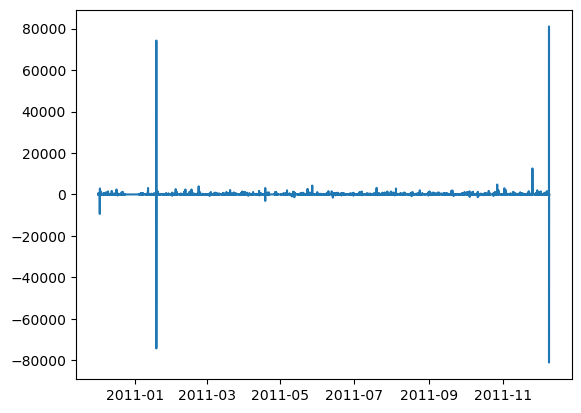

In [157]:
plt.plot(df["fecha"],df["Quantity"])
plt.show()

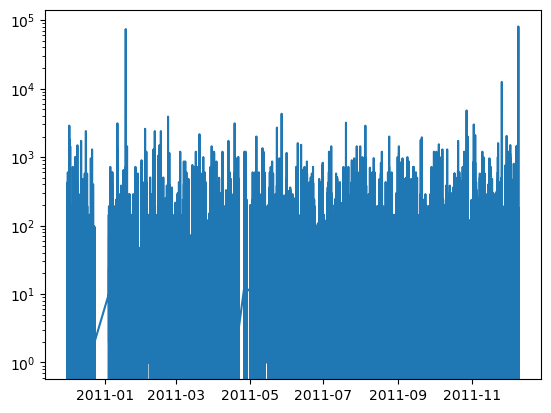

In [158]:
fig, ax = plt.subplots()
ax.plot(df["fecha"], df["Quantity"])
ax.set_yscale("log")
plt.show()

In [159]:
# Separamos la hora en una columan diferente de la fecha
df['hora'] = df['fecha'].dt.hour
#df['hora'] = [d.date() for d in df['fecha']]
#df['hora'] = [d.time() for d in df['fecha']]
#df['fecha'] = df['InvoiceDate'].dt.date
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,fecha,hora
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,8
...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09 12:50:00,12
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09 12:50:00,12
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,12
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,12


In [160]:
# Vemos el tipo de valor de la columna HORA.
df["hora"].dtype

dtype('int64')

In [161]:
# Visualizamos los valores de la columna Hora.
df["hora"].value_counts()

12    73342
13    65062
14    55075
11    50249
15    46220
10    38951
16    24997
9     22464
17    13734
8      8792
19     3511
18     3137
20      871
7       383
6        41
Name: hora, dtype: int64

In [162]:
# Ordenamos la columna de hora en forma ascendente.
manf_sortH = pd.get_dummies(df["hora"]).sum().sort_values(ascending = False)

C:\Users\jesus\Nuevo Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


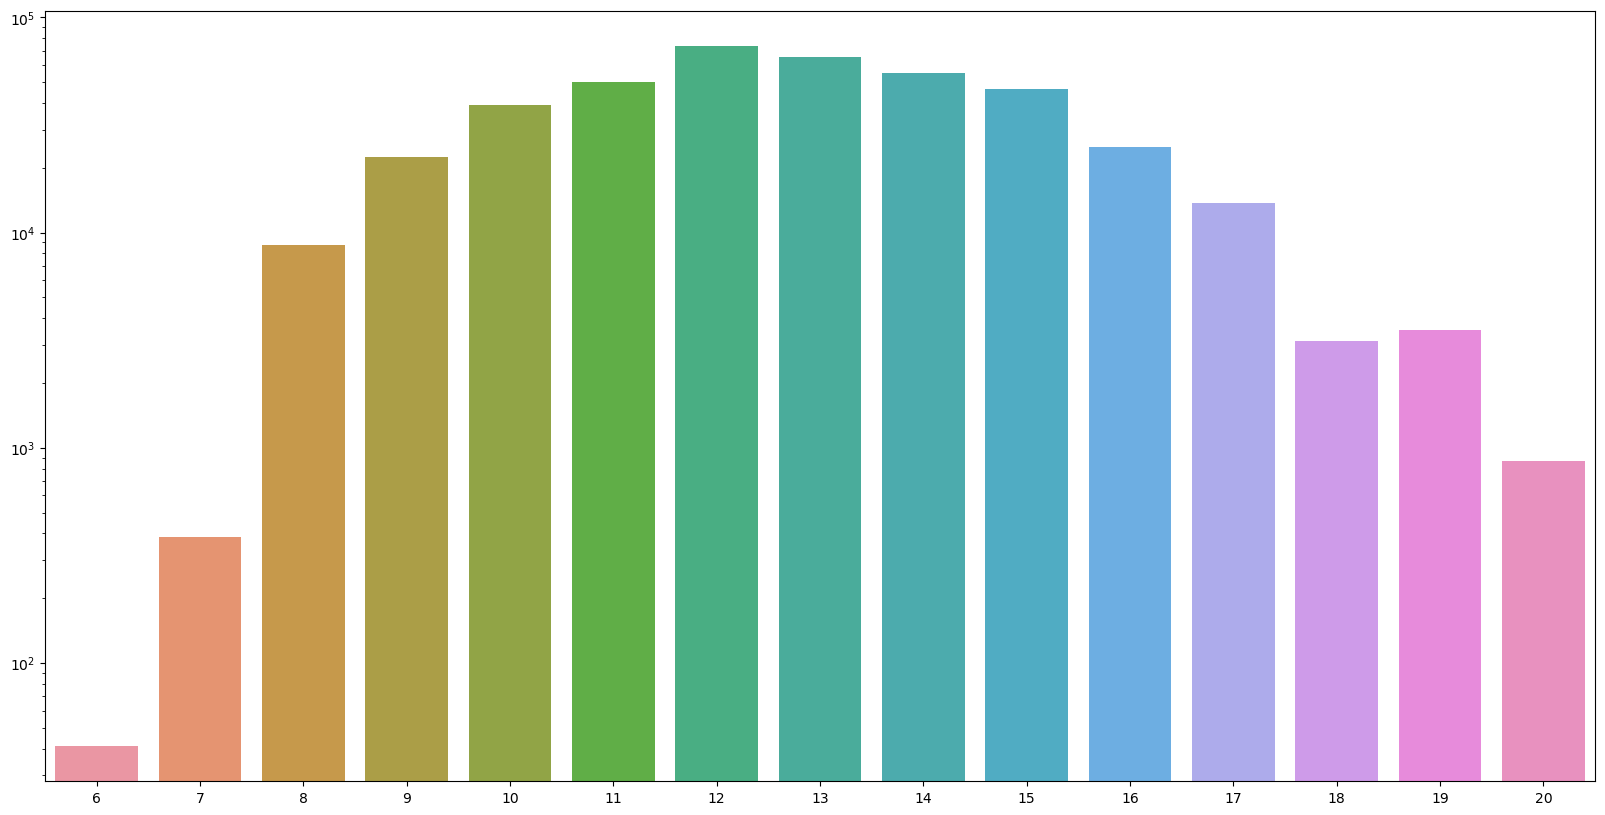

In [163]:
# Hacemos un grafico de las horas donde se hicieron las compras.
firstTwenty=manf_sortH[:20]
plt.figure(figsize=(20,10))
sns.barplot(firstTwenty.index,firstTwenty.values)
plt.yscale("log")
plt.show()

In [164]:
customer_item_matrix = df.pivot_table(index='CustomerID',columns='StockCode',values='Quantity',aggfunc='sum')
customer_item_matrix

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sns.pairplot(df);

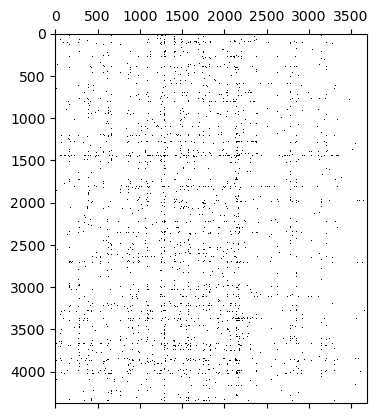

In [165]:
plt.spy(customer_item_matrix)
plt.show()

In [166]:
# Reemplazamos NaNs con ceros (0)
userItemZero = customer_item_matrix.fillna(0)

userItemZero

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
from sklearn.metrics.pairwise import cosine_similarity

# User to User Similarity Matrix
userUser = pd.DataFrame(cosine_similarity(userItemZero))
userUser.columns = customer_item_matrix.index

userUser

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.000000,0.011921,0.074510,0.108942
2,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.000000,0.000000,0.175170,0.110096
3,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.000000,0.014689,0.065295,0.022576
4,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0.0,0.037236,0.000000,0.000000,0.000000,0.000000,0.0,0.002707,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.043042,1.000000,0.098363,0.000000,0.000000,0.000000
4368,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000435,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.098363,1.000000,0.000000,0.098201,0.000000
4369,0.0,0.011921,0.000000,0.014689,0.000000,0.002966,0.0,0.000000,0.007169,0.004772,...,0.0,0.0,0.000000,-0.001372,0.000000,0.000000,0.000000,1.000000,0.003776,0.000000
4370,0.0,0.074510,0.175170,0.065295,0.019385,0.017238,0.0,0.104890,0.050042,0.063930,...,0.0,0.0,0.032142,0.070999,0.000000,0.000000,0.098201,0.003776,1.000000,0.044445


In [168]:
userUser.index = customer_item_matrix.index
userUser

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.000000,0.011921,0.074510,0.108942
12348.0,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.000000,0.000000,0.175170,0.110096
12349.0,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.000000,0.014689,0.065295,0.022576
12350.0,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.037236,0.000000,0.000000,0.000000,0.000000,0.0,0.002707,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.043042,1.000000,0.098363,0.000000,0.000000,0.000000
18281.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000435,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.098363,1.000000,0.000000,0.098201,0.000000
18282.0,0.0,0.011921,0.000000,0.014689,0.000000,0.002966,0.0,0.000000,0.007169,0.004772,...,0.0,0.0,0.000000,-0.001372,0.000000,0.000000,0.000000,1.000000,0.003776,0.000000


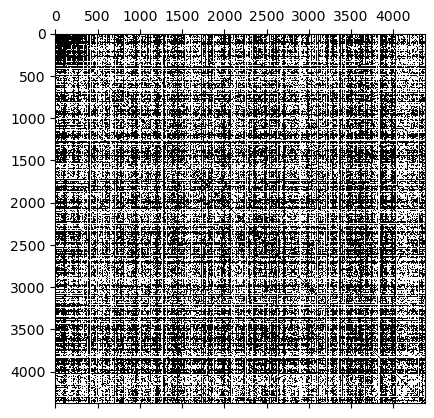

In [169]:
plt.spy(userUser)
plt.show()

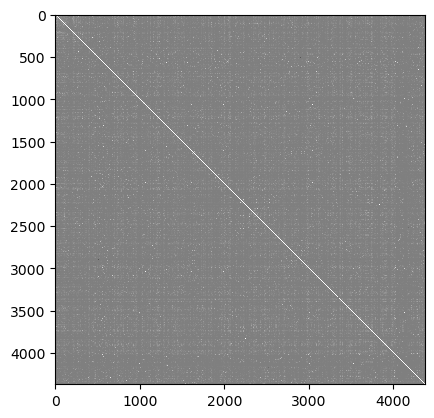

In [170]:
plt.imshow(userUser, cmap='gray', interpolation='nearest')
plt.show()

In [171]:
# Buscamos un usuario para tener referencias.
userUser[15719.0]

CustomerID
12346.0    0.000000
12347.0    0.032889
12348.0    0.033950
12349.0    0.054821
12350.0    0.018395
             ...   
18280.0    0.005338
18281.0    0.059413
18282.0    0.011825
18283.0    0.449308
18287.0    0.001793
Name: 15719.0, Length: 4372, dtype: float64

In [172]:
# Articulos mas comprados del usuario seleccionado.
userSelec = userItemZero.loc[15719.0, :].sort_values(ascending = False)
userSelec

StockCode
85099B    119.0
22178      60.0
85099F     55.0
23203      50.0
23199      50.0
          ...  
22405       0.0
22406       0.0
22407       0.0
22408       0.0
POST        0.0
Name: 15719.0, Length: 3684, dtype: float64

In [173]:
userSelec.value_counts()

0.0      3385
2.0        50
1.0        44
3.0        30
4.0        21
6.0        17
5.0        15
12.0       11
7.0        11
8.0        10
10.0        8
11.0        8
18.0        7
9.0         6
14.0        6
24.0        6
16.0        5
15.0        4
25.0        4
22.0        3
27.0        3
28.0        3
13.0        2
19.0        2
17.0        2
20.0        2
21.0        2
23.0        2
32.0        2
36.0        2
50.0        2
60.0        1
26.0        1
29.0        1
31.0        1
34.0        1
35.0        1
42.0        1
55.0        1
119.0       1
Name: 15719.0, dtype: int64

In [174]:
# Descripcion de los articulos mas comprados por el usuario seleccionado.
# Hacemos un filtro de los 10 stockcode para que nos de su descripcion correpondiente.
# Lo vamos añadiendo a una variable con el append.
items = []
r = dfMas[dfMas["StockCode"] == "85099B"].iloc[0]["Description"]    
items.append(r)
r = dfMas[dfMas["StockCode"] == "22178"].iloc[0]["Description"]
items.append(r)
r = dfMas[dfMas["StockCode"] == "85099F"].iloc[0]["Description"]
items.append(r)
r = dfMas[dfMas["StockCode"] == "23203"].iloc[0]["Description"]
items.append(r)
r = dfMas[dfMas["StockCode"] == "23199"].iloc[0]["Description"]
items.append(r)
print(items)

['JUMBO BAG RED RETROSPOT', 'VICTORIAN GLASS HANGING T-LIGHT', 'JUMBO BAG STRAWBERRY', 'JUMBO BAG DOILEY PATTERNS', 'JUMBO BAG APPLES']


In [175]:
# Ordenamos de orden ascendente para 
ranking = userUser[18287.0].sort_values(ascending = False)
ranking

CustomerID
18287.0    1.000000
13295.0    0.406367
16593.0    0.330325
16438.0    0.260285
13271.0    0.244930
             ...   
18087.0   -0.000273
14410.0   -0.014108
17307.0   -0.044532
18256.0   -0.055345
14777.0   -0.171276
Name: 18287.0, Length: 4372, dtype: float64

In [176]:
type(ranking)

pandas.core.series.Series

In [177]:
# Le pedimos con dos condiciones que nos de los usuarios con mayor a 0 y menor a 1.
# Para que nos de los que mas tienen similitudes.
similares = ranking[(ranking > 0) & (ranking < 1)]
similares

CustomerID
13295.0    0.406367
16593.0    0.330325
16438.0    0.260285
13271.0    0.244930
15952.0    0.203774
             ...   
18225.0    0.000073
12684.0    0.000073
13435.0    0.000072
12989.0    0.000027
17966.0    0.000018
Name: 18287.0, Length: 2112, dtype: float64

In [178]:
# Visualizamos el tipo de dato que es similares.
type(similares)

pandas.core.series.Series

In [179]:
list(similares.index)

[13295.0,
 16593.0,
 16438.0,
 13271.0,
 15952.0,
 12355.0,
 13005.0,
 16174.0,
 14246.0,
 15434.0,
 15025.0,
 17459.0,
 12425.0,
 14257.0,
 16332.0,
 14719.0,
 17321.0,
 16204.0,
 16884.0,
 15393.0,
 13623.0,
 17537.0,
 12794.0,
 14326.0,
 14904.0,
 17866.0,
 14723.0,
 14163.0,
 17758.0,
 15592.0,
 13566.0,
 17242.0,
 13978.0,
 14301.0,
 14409.0,
 17059.0,
 15882.0,
 15458.0,
 13532.0,
 13972.0,
 16054.0,
 13685.0,
 14093.0,
 13352.0,
 14572.0,
 13311.0,
 13091.0,
 15800.0,
 14014.0,
 14339.0,
 16863.0,
 16804.0,
 16348.0,
 17561.0,
 17489.0,
 14739.0,
 12847.0,
 14997.0,
 16734.0,
 17589.0,
 16820.0,
 16768.0,
 15717.0,
 13697.0,
 16206.0,
 13448.0,
 15539.0,
 17180.0,
 15252.0,
 14704.0,
 13394.0,
 12348.0,
 17364.0,
 12347.0,
 14112.0,
 17828.0,
 15530.0,
 15396.0,
 12879.0,
 12462.0,
 15949.0,
 14684.0,
 17082.0,
 12364.0,
 13471.0,
 17135.0,
 16020.0,
 15105.0,
 18276.0,
 13885.0,
 16268.0,
 14808.0,
 15750.0,
 13277.0,
 14480.0,
 13790.0,
 15306.0,
 17774.0,
 14722.0,
 15215.0,


In [180]:
# Guardamos los 10 usuarios con mas similitud y los guardamos
s = similares.iloc[:10]
s

CustomerID
13295.0    0.406367
16593.0    0.330325
16438.0    0.260285
13271.0    0.244930
15952.0    0.203774
12355.0    0.201498
13005.0    0.198885
16174.0    0.194826
14246.0    0.189299
15434.0    0.186651
Name: 18287.0, dtype: float64

In [181]:
# Recordemos el aspecto de userItem.
customer_item_matrix

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
# Obtenemos las recomendaciones de los usuarios similares
customer_item_matrix.loc[list(s.index)]

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
13295.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16438.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13271.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15952.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
# Hacemos un loc y sum del STOCKCODE.
Lista = customer_item_matrix.loc[list(s.index)].sum()
Lista

StockCode
10002     0.0
10080     0.0
10120     0.0
10123C    0.0
10124A    0.0
         ... 
D         0.0
DOT       0.0
M         0.0
PADS      0.0
POST      0.0
Length: 3684, dtype: float64

In [184]:
# Ordenamos de forma ascendente para ver los Stockcode mas comprados.
ListaOrdenada = Lista.sort_values(ascending = False)
ListaOrdenada

StockCode
23078    408.0
23077    280.0
23076    216.0
23310    144.0
22693     72.0
         ...  
22415      0.0
22416      0.0
22417      0.0
POST       0.0
71477     -1.0
Length: 3684, dtype: float64

In [185]:
# Guardamos los 10 articulos con mas similitud y los guardamos
l = ListaOrdenada.iloc[:10]
l

StockCode
23078     408.0
23077     280.0
23076     216.0
23310     144.0
22693      72.0
85039A     68.0
85040A     62.0
21824      58.0
84879      48.0
72351B     41.0
dtype: float64

In [186]:
# Creamos un dataset resumido para ver la descripcion de los stockcode.
dfRe = df[["Description", "StockCode"]]
dfRe

,Description,StockCode
0,WHITE HANGING HEART T-LIGHT HOLDER,85123A
1,WHITE METAL LANTERN,71053
2,CREAM CUPID HEARTS COAT HANGER,84406B
3,KNITTED UNION FLAG HOT WATER BOTTLE,84029G
4,RED WOOLLY HOTTIE WHITE HEART.,84029E
...,...,...
406824,PACK OF 20 SPACEBOY NAPKINS,22613
406825,CHILDREN'S APRON DOLLY GIRL,22899
406826,CHILDRENS CUTLERY DOLLY GIRL,23254
406827,CHILDRENS CUTLERY CIRCUS PARADE,23255


In [187]:
# Hacemos un filtro de los 10 stockcode para que nos de su descripcion correpondiente.
# Lo vamos añadiendo a una variable con el append.
resultado = []
r = dfRe[dfRe["StockCode"] == "23078"].iloc[0]["Description"]    
resultado.append(r)
r = dfRe[dfRe["StockCode"] == "23077"].iloc[0]["Description"]
resultado.append(r)
r = dfRe[dfRe["StockCode"] == "23076"].iloc[0]["Description"]
resultado.append(r)
r = dfRe[dfRe["StockCode"] == "23310"].iloc[0]["Description"]
resultado.append(r)
r = dfRe[dfRe["StockCode"] == "22693"].iloc[0]["Description"]
resultado.append(r)
r = dfRe[dfRe["StockCode"] == "85039A"].iloc[0]["Description"]
resultado.append(r)
r = dfRe[dfRe["StockCode"] == "85040A"].iloc[0]["Description"]
resultado.append(r)
r = dfRe[dfRe["StockCode"] == "21824"].iloc[0]["Description"]
resultado.append(r)
r = dfRe[dfRe["StockCode"] == "84879"].iloc[0]["Description"]
resultado.append(r)
r = dfRe[dfRe["StockCode"] == "72351B"].iloc[0]["Description"]
resultado.append(r) 
print(resultado)


['ICE CREAM PEN LIP GLOSS ', 'DOUGHNUT LIP GLOSS ', 'ICE CREAM SUNDAE LIP GLOSS', 'BUBBLEGUM RING ASSORTED', 'GROW A FLYTRAP OR SUNFLOWER IN TIN', 'SET/4 RED MINI ROSE CANDLE IN BOWL', 'S/4 PINK FLOWER CANDLES IN BOWL', 'PAINTED METAL STAR WITH HOLLY BELLS', 'ASSORTED COLOUR BIRD ORNAMENT', 'SET/6 PINK  BUTTERFLY T-LIGHTS']


In [188]:
# Visualizamos el tipo de la variable de las descripciones.
type(resultado)

list

In [189]:
# Hacemos un LEN sobre la variable.
print(len(resultado))

10


In [190]:
# Convertimos  L en  dataFrame
dfSimilaridad = pd.DataFrame(l)
dfSimilaridad

,0
StockCode,
23078,408.0
23077,280.0
23076,216.0
23310,144.0
22693,72.0
85039A,68.0
85040A,62.0
21824,58.0
84879,48.0


In [191]:
# Creamos la columna de descripcion en el dataset de similaridad.
dfSimilaridad["description"] = resultado

In [192]:
dfSimilaridad

,0,description
StockCode,,
23078,408.0,ICE CREAM PEN LIP GLOSS
23077,280.0,DOUGHNUT LIP GLOSS
23076,216.0,ICE CREAM SUNDAE LIP GLOSS
23310,144.0,BUBBLEGUM RING ASSORTED
22693,72.0,GROW A FLYTRAP OR SUNFLOWER IN TIN
85039A,68.0,SET/4 RED MINI ROSE CANDLE IN BOWL
85040A,62.0,S/4 PINK FLOWER CANDLES IN BOWL
21824,58.0,PAINTED METAL STAR WITH HOLLY BELLS
84879,48.0,ASSORTED COLOUR BIRD ORNAMENT


In [193]:
# Vamos a cambiar el nombre de las columnas de las ventas de los stockcode del dataset
dfSimilaridad.columns = ['sales', 'description']
dfSimilaridad

,sales,description
StockCode,,
23078,408.0,ICE CREAM PEN LIP GLOSS
23077,280.0,DOUGHNUT LIP GLOSS
23076,216.0,ICE CREAM SUNDAE LIP GLOSS
23310,144.0,BUBBLEGUM RING ASSORTED
22693,72.0,GROW A FLYTRAP OR SUNFLOWER IN TIN
85039A,68.0,SET/4 RED MINI ROSE CANDLE IN BOWL
85040A,62.0,S/4 PINK FLOWER CANDLES IN BOWL
21824,58.0,PAINTED METAL STAR WITH HOLLY BELLS
84879,48.0,ASSORTED COLOUR BIRD ORNAMENT


In [194]:
# Vamos a crear nuestro matrix de similaridad item vs item.
item_matrix = df.pivot_table(index='StockCode',columns='CustomerID',values='Quantity',aggfunc='sum')
item_matrix

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10123C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10124A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


In [195]:
# Reemplazamos NaNs con ceros (0)
itemItemZero = item_matrix.fillna(0)
itemItemZero

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10123C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10124A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DOT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [196]:
# item to item Similarity Matrix
itemItem = pd.DataFrame(cosine_similarity(itemItemZero))
itemItem.columns = itemItemZero.index
itemItem

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
0,1.000000,0.000000,0.001548,0.000990,0.0,0.000000,0.853890,0.052106,0.021922,0.004643,...,0.000000,0.0,0.000000,0.038750,0.000000,-0.000051,0.000000,0.000258,0.0,0.070843
1,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.004958,0.020655,0.011878,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006,0.0,0.000000
2,0.001548,0.000000,1.000000,0.004903,0.0,0.000000,0.001600,0.042560,0.010420,0.014993,...,0.000000,0.0,0.000000,0.000000,0.000000,-0.000021,0.000000,0.007154,0.0,0.000000
3,0.000990,0.000000,0.004903,1.000000,0.0,0.000000,0.004417,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,1.0,0.491784,0.001099,0.014973,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,-0.000051,0.000000,-0.000021,0.000000,0.0,0.000000,-0.000217,-0.000074,-0.000879,-0.000066,...,0.000000,0.0,0.000000,-0.001276,0.000000,1.000000,0.000000,0.061591,0.0,-0.000268
3680,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.153671,0.063144,...,0.000000,0.0,0.000000,0.000000,-1.000000,0.000000,1.000000,-0.000207,0.0,0.000000
3681,0.000258,0.000006,0.007154,0.000000,0.0,0.000000,0.000055,0.002713,0.001672,-0.034300,...,0.000000,0.0,0.001343,-0.000032,0.000207,0.061591,-0.000207,1.000000,0.0,-0.023027
3682,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.028508,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000


In [197]:
itemItem.index = itemItemZero.index
itemItem

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.001548,0.000990,0.0,0.000000,0.853890,0.052106,0.021922,0.004643,...,0.000000,0.0,0.000000,0.038750,0.000000,-0.000051,0.000000,0.000258,0.0,0.070843
10080,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.004958,0.020655,0.011878,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006,0.0,0.000000
10120,0.001548,0.000000,1.000000,0.004903,0.0,0.000000,0.001600,0.042560,0.010420,0.014993,...,0.000000,0.0,0.000000,0.000000,0.000000,-0.000021,0.000000,0.007154,0.0,0.000000
10123C,0.000990,0.000000,0.004903,1.000000,0.0,0.000000,0.004417,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
10124A,0.000000,0.000000,0.000000,0.000000,1.0,0.491784,0.001099,0.014973,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D,-0.000051,0.000000,-0.000021,0.000000,0.0,0.000000,-0.000217,-0.000074,-0.000879,-0.000066,...,0.000000,0.0,0.000000,-0.001276,0.000000,1.000000,0.000000,0.061591,0.0,-0.000268
DOT,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.153671,0.063144,...,0.000000,0.0,0.000000,0.000000,-1.000000,0.000000,1.000000,-0.000207,0.0,0.000000
M,0.000258,0.000006,0.007154,0.000000,0.0,0.000000,0.000055,0.002713,0.001672,-0.034300,...,0.000000,0.0,0.001343,-0.000032,0.000207,0.061591,-0.000207,1.000000,0.0,-0.023027


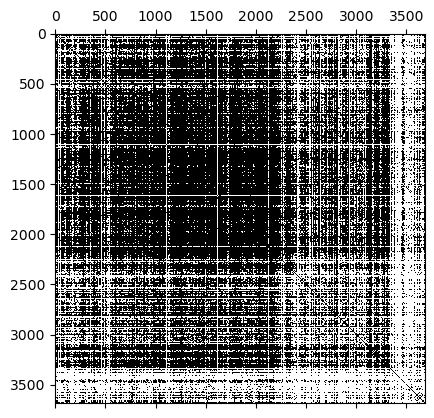

In [198]:
plt.spy(itemItem)
plt.show()

In [199]:
itemItem["10124A"]

StockCode
10002     0.0
10080     0.0
10120     0.0
10123C    0.0
10124A    1.0
         ... 
D         0.0
DOT       0.0
M         0.0
PADS      0.0
POST      0.0
Name: 10124A, Length: 3684, dtype: float64

In [200]:
# Ordenamos de orden ascendente para 
Ventas = itemItem["10124A"].sort_values(ascending = False)
Ventas

StockCode
10124A    1.000000
10124G    0.491784
21167     0.229083
82011A    0.175075
84466     0.151620
            ...   
22460     0.000000
22461     0.000000
22465     0.000000
22467     0.000000
POST      0.000000
Name: 10124A, Length: 3684, dtype: float64

In [201]:
# Le pedimos con dos condiciones que nos de los items con mayor a 0 y menor a 0.99.
# Para que nos de los que mas tienen similitudes.
masVentas = Ventas[(Ventas > 0) & (Ventas < 0.99)]
masVentas

StockCode
10124G    0.491784
21167     0.229083
82011A    0.175075
84466     0.151620
47351B    0.144291
            ...   
21098     0.000168
22690     0.000159
22149     0.000106
22759     0.000095
21915     0.000046
Name: 10124A, Length: 683, dtype: float64

In [202]:
# Guardamos los 10 item con mas similitud y los guardamos
sells = masVentas.iloc[:10]
sells

StockCode
10124G    0.491784
21167     0.229083
82011A    0.175075
84466     0.151620
47351B    0.144291
21018     0.133949
85040B    0.120150
82011B    0.103883
20756     0.101922
20755     0.099729
Name: 10124A, dtype: float64

In [203]:
# Obtenemos las recomendaciones de los items similares
itemItem.loc[list(sells.index)]

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10124G,0.000000,0.000000,0.000000,0.00000,0.491784,1.000000,0.003919,0.013346,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
21167,0.000477,0.024799,0.014186,0.00000,0.229083,0.000000,0.000913,0.015335,0.014768,0.014689,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.008502,0.0,0.000000
82011A,0.005471,0.000000,0.000000,0.00000,0.175075,0.156055,0.000000,0.009978,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,-0.022706,0.0,0.000103,0.0,0.000000
84466,0.000000,0.000000,0.125191,0.00000,0.151620,0.135147,0.000000,0.008229,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000099,0.0,0.000000
47351B,0.000000,0.048812,0.000000,0.00000,0.144291,0.128615,0.017248,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.011354
21018,0.000000,0.000000,0.000000,0.00000,0.133949,0.000000,0.000534,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.005783,0.0,0.000000
85040B,0.000000,0.000000,0.156251,0.05173,0.120150,0.107097,0.002633,0.006684,0.000298,0.020223,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000869,0.0,0.000000
82011B,0.005519,0.000000,0.000000,0.00000,0.103883,0.092597,0.000000,0.011277,0.015455,0.004996,...,0.0,0.0,0.0,0.097283,0.0,-0.015847,0.0,0.000082,0.0,0.000170
20756,0.000000,0.000000,0.003156,0.00000,0.101922,0.090849,0.000000,0.005532,0.005054,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.005333,0.0,0.002673


In [204]:
# Hacemos un loc y sum del ventas.
ListaVentas =  customer_item_matrix.loc[:,list(sells.index)].sum()
ListaVentas

StockCode
10124G      17.0
21167     1210.0
82011A      16.0
84466       46.0
47351B      38.0
21018       22.0
85040B     131.0
82011B      41.0
20756       63.0
20755      292.0
dtype: float64

In [205]:
# Ordenamos de forma ascendente para ver los items mas vendidos.
ListaOrdenadaVentas = ListaVentas.sort_values(ascending = False)
ListaOrdenadaVentas

StockCode
21167     1210.0
20755      292.0
85040B     131.0
20756       63.0
84466       46.0
82011B      41.0
47351B      38.0
21018       22.0
10124G      17.0
82011A      16.0
dtype: float64

In [206]:
# Guardamos los 10 items con mas similitud y los guardamos
sell = ListaOrdenadaVentas.iloc[:10]
sell

StockCode
21167     1210.0
20755      292.0
85040B     131.0
20756       63.0
84466       46.0
82011B      41.0
47351B      38.0
21018       22.0
10124G      17.0
82011A      16.0
dtype: float64

In [207]:
# Creamos un dataset resumido para ver la descripcion de los stockcode.
dfMas = df[["Description", "StockCode"]]
dfMas

,Description,StockCode
0,WHITE HANGING HEART T-LIGHT HOLDER,85123A
1,WHITE METAL LANTERN,71053
2,CREAM CUPID HEARTS COAT HANGER,84406B
3,KNITTED UNION FLAG HOT WATER BOTTLE,84029G
4,RED WOOLLY HOTTIE WHITE HEART.,84029E
...,...,...
406824,PACK OF 20 SPACEBOY NAPKINS,22613
406825,CHILDREN'S APRON DOLLY GIRL,22899
406826,CHILDRENS CUTLERY DOLLY GIRL,23254
406827,CHILDRENS CUTLERY CIRCUS PARADE,23255


In [208]:
# Hacemos un filtro de los 10 stockcode para que nos de su descripcion correpondiente.
# Lo vamos añadiendo a una variable con el append.
result = []
r = dfMas[dfMas["StockCode"] == "21167"].iloc[0]["Description"]    
result.append(r)
r = dfMas[dfMas["StockCode"] == "20755"].iloc[0]["Description"]
result.append(r)
r = dfMas[dfMas["StockCode"] == "85040B"].iloc[0]["Description"]
result.append(r)
r = dfMas[dfMas["StockCode"] == "20756"].iloc[0]["Description"]
result.append(r)
r = dfMas[dfMas["StockCode"] == "84466"].iloc[0]["Description"]
result.append(r)
r = dfMas[dfMas["StockCode"] == "82011B"].iloc[0]["Description"]
result.append(r)
r = dfMas[dfMas["StockCode"] == "47351B"].iloc[0]["Description"]
result.append(r)
r = dfMas[dfMas["StockCode"] == "21018"].iloc[0]["Description"]
result.append(r)
r = dfMas[dfMas["StockCode"] == "10124G"].iloc[0]["Description"]
result.append(r)
r = dfMas[dfMas["StockCode"] == "82011A"].iloc[0]["Description"]
result.append(r)
print(result)

['WHITE SAGE INCENSE', 'BLUE PAISLEY POCKET BOOK', 'SET/4 BLUE FLOWER CANDLES IN BOWL', 'GREEN FERN POCKET BOOK', 'TOP SECRET PEN SET', 'BATHROOM SCALES RUBBER DUCKS', 'BLUE  VOILE LAMPSHADE', 'BIRD BOX CHRISTMAS TREE DECORATION', 'ARMY CAMO BOOKCOVER TAPE', 'BATHROOM SCALES, TROPICAL BEACH']


In [209]:
# Convertimos  sell en  dataFrame
dfSimilar = pd.DataFrame(sell)
dfSimilar

,0
StockCode,
21167,1210.0
20755,292.0
85040B,131.0
20756,63.0
84466,46.0
82011B,41.0
47351B,38.0
21018,22.0
10124G,17.0


In [210]:
# Creamos la columna de descripción en el dataset de similaridad.
dfSimilar["description"] = result

In [211]:
# En base a este producto que seleccionamos, veremos los 10 item con mas similaridad.
dfMas[dfMas["StockCode"] == "10124A"].iloc[0]["Description"]

'SPOTS ON RED BOOKCOVER TAPE'

In [212]:
# Vamos a cambiar el nombre de las columnas de las ventas de los stockcode del dataset
dfSimilar.columns = ['sales', 'description']
dfSimilar

,sales,description
StockCode,,
21167,1210.0,WHITE SAGE INCENSE
20755,292.0,BLUE PAISLEY POCKET BOOK
85040B,131.0,SET/4 BLUE FLOWER CANDLES IN BOWL
20756,63.0,GREEN FERN POCKET BOOK
84466,46.0,TOP SECRET PEN SET
82011B,41.0,BATHROOM SCALES RUBBER DUCKS
47351B,38.0,BLUE VOILE LAMPSHADE
21018,22.0,BIRD BOX CHRISTMAS TREE DECORATION
10124G,17.0,ARMY CAMO BOOKCOVER TAPE


In [213]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,fecha,hora
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,8
...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09 12:50:00,12
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09 12:50:00,12
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,12
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,12


In [214]:
dfSimplificado = df[["InvoiceNo", "Description"]]
dfSimplificado

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
406824,581587,PACK OF 20 SPACEBOY NAPKINS
406825,581587,CHILDREN'S APRON DOLLY GIRL
406826,581587,CHILDRENS CUTLERY DOLLY GIRL
406827,581587,CHILDRENS CUTLERY CIRCUS PARADE


In [215]:
# Agrupar por customerID y combinar las descripciones de ventas en una lista
Simplificar = dfSimplificado.groupby("InvoiceNo")["Description"].agg(list)

In [216]:
# Convertir el resultado en una lista de listas
datos = Simplificar.tolist()
datos

[['WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN',
  'CREAM CUPID HEARTS COAT HANGER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'GLASS STAR FROSTED T-LIGHT HOLDER'],
 ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'],
 ['ASSORTED COLOUR BIRD ORNAMENT',
  "POPPY'S PLAYHOUSE BEDROOM ",
  "POPPY'S PLAYHOUSE KITCHEN",
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'IVORY KNITTED MUG COSY ',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE JIGSAW BLOCKS ',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'HOME BUILDING BLOCK WORD',
  'LOVE BUILDING BLOCK WORD',
  'RECIPE BOX WITH METAL HEART',
  'DOORMAT NEW ENGLAND'],
 ['JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION',
  'BLUE COAT RACK PARIS FASHION'],
 ['BATH BUILDING BLOCK WORD'],
 ['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED ',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET'

In [217]:
from apyori import apriori
# Utilizar el algoritmo Apriori para generar conjuntos de elementos frecuentes y reglas de asociación
conjuntos_frecuentes = list(apriori(datos, min_support=0.01, min_confidence=0.85, min_lift=1.2))

In [218]:
# Imprimir los conjuntos de elementos frecuentes y las reglas de asociación resultantes
print("Conjuntos Frecuentes:")
for conjunto in conjuntos_frecuentes:
    print(conjunto.items)
print("\nReglas de Asociación:")
for conjunto in conjuntos_frecuentes:
    for regla in conjunto.ordered_statistics:
        antecedente = list(regla.items_base)
        consecuente = list(regla.items_add)
        confianza = regla.confidence
        lift = regla.lift
        print(f"{antecedente} -> {consecuente}, confianza = {confianza:.2f}, lift = {lift:.2f}")

Conjuntos Frecuentes:
frozenset({'REGENCY CAKESTAND 3 TIER', 'PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'})
frozenset({'ROSES REGENCY TEACUP AND SAUCER ', 'PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'})
frozenset({'REGENCY CAKESTAND 3 TIER', 'ROSES REGENCY TEACUP AND SAUCER ', 'PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'})

Reglas de Asociación:
['REGENCY CAKESTAND 3 TIER', 'PINK REGENCY TEACUP AND SAUCER'] -> ['GREEN REGENCY TEACUP AND SAUCER'], confianza = 0.86, lift = 26.00
['ROSES REGENCY TEACUP AND SAUCER ', 'PINK REGENCY TEACUP AND SAUCER'] -> ['GREEN REGENCY TEACUP AND SAUCER'], confianza = 0.88, lift = 26.65
['REGENCY CAKESTAND 3 TIER', 'PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'] -> ['ROSES REGENCY TEACUP AND SAUCER '], confianza = 0.88, lift = 23.35
['REGENCY CAKESTAND 3 TIER', 'ROSES REGENCY TEACUP AND SAUCER ', 'PINK REGENCY TEACUP AND SAUCER'] -> ['GREEN REGENCY TEACUP AND SAUCER'],